In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('daily-total-female-births.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


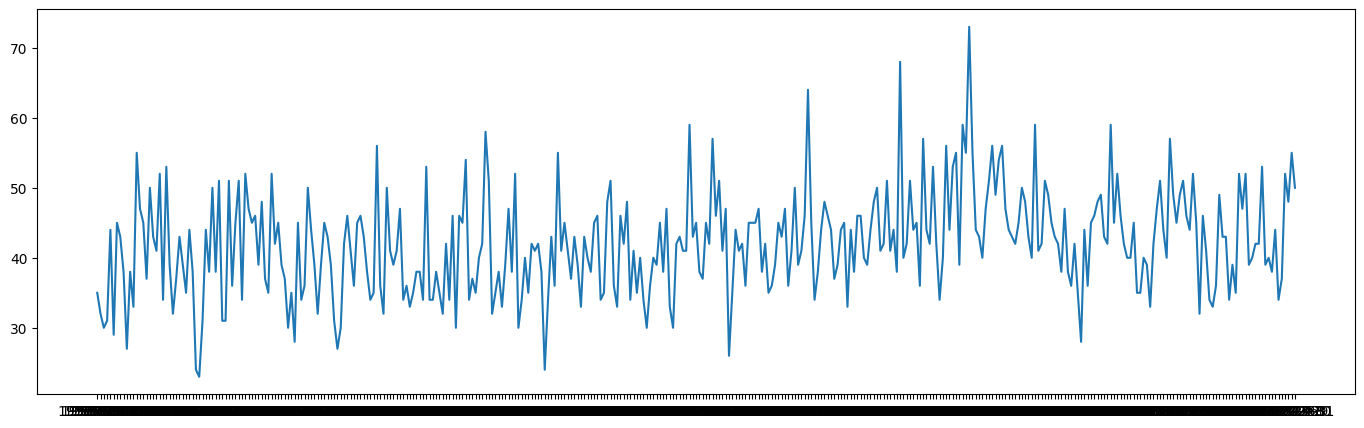

In [12]:
series=pd.read_csv('daily-total-female-births.csv',header=0,index_col=0)
plt.figure(figsize=(17,5))
plt.plot(series)

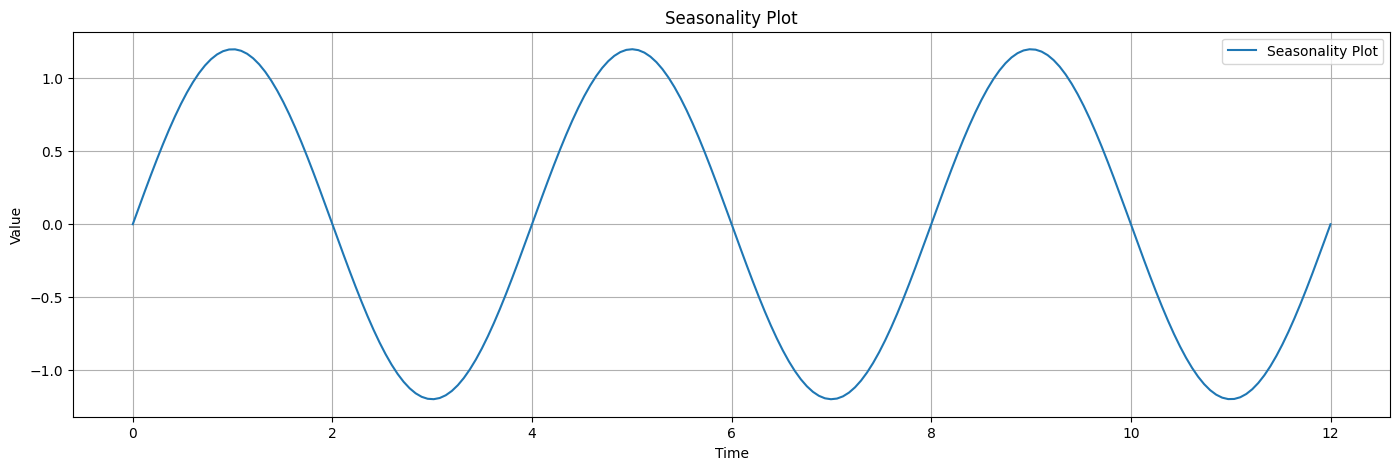

In [14]:
import numpy as np
x_axis=np.linspace(0,12,num=200)
seas=1.2*np.sin(2 * np.pi * x_axis / 4)
plt.figure(figsize=(17,5))
plt.plot(x_axis,seas,label='Seasonality Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Seasonality Plot')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
df1=pd.read_csv('daily-min-temperatures.csv',parse_dates=['Date'],index_col='Date')
df1.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


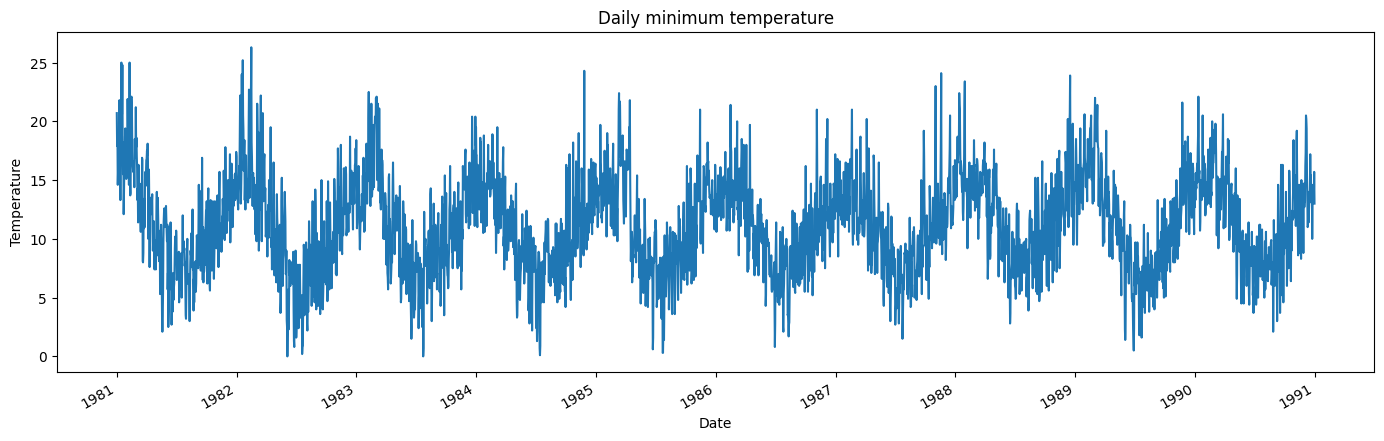

In [17]:
df1.plot(title="Daily minimum temperature",figsize=(17,5),legend=None)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [21]:
#KPSS Test
from statsmodels.tsa.stattools import kpss
def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Number of Lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value:.4f}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
kpss_test(df1['Temp'])


KPSS Statistic: 0.05570612670427435
p-value: 0.1
Number of Lags: 36
Critial Values:
   10% : 0.3470
   5% : 0.4630
   2.5% : 0.5740
   1% : 0.7390
Result: The series is stationary


<ipython-input-21-00ea24d9968f>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series)


In [27]:
#Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df1['Temp'],model='additive',period=365)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

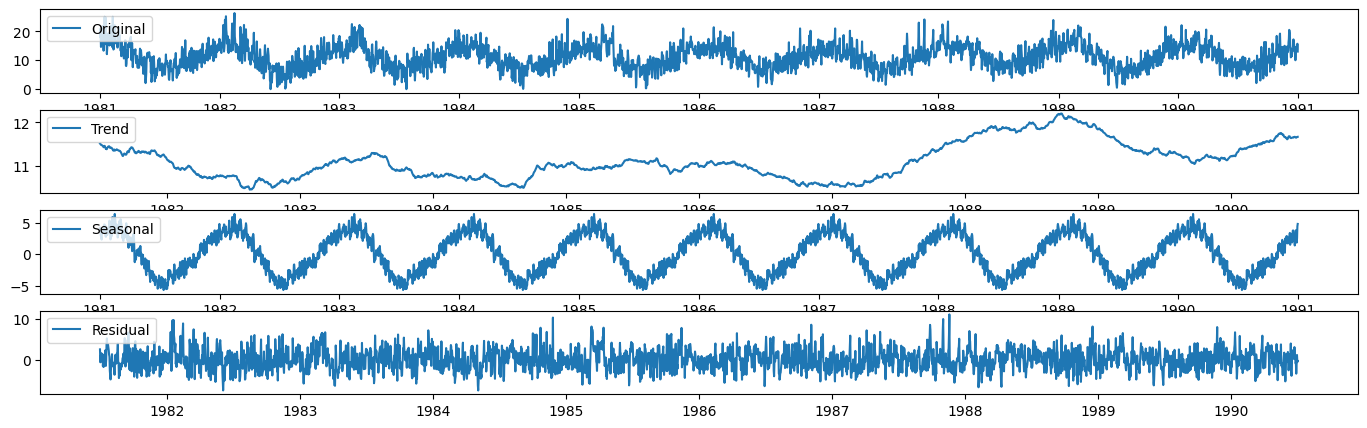

In [28]:
plt.figure(figsize=(17,5))
plt.subplot(411)
plt.plot(df1['Temp'],label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='upper left')
plt.show()